In [1]:
# This notebook uses the MNIST clothing data set to use CNNs - 10 labels for 28x28 grayscale clothing images
# The training set of 60,000 images and 10,000 test images

In [5]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

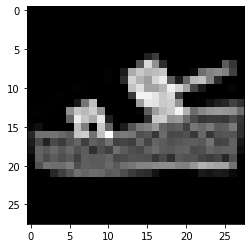

In [11]:
# Looking at an image
plt.imshow(x_train[12], cmap = 'gray')

In [9]:
# It's a sandal!

In [12]:
# Normalising the data range

x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [25]:
# Reshape data - 4 channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [26]:
# One-hot encoding y_train and y_test -> 10 labels

from keras.utils.np_utils import to_categorical
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [27]:
# Building the model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
# Model defintion

model = Sequential()
# Conv layer
model.add(Conv2D(filters=32, kernel_size = (4,4),input_shape=(28,28,1), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten 2D to 1D
model.add(Flatten())
# Dense layer
model.add(Dense(128,activation='relu'))
# Output classifier
model.add(Dense(10,activation='softmax'))
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Training the model

model.fit(x_train,y_cat_train, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 35s 584us/step - loss: 0.3933 - accuracy: 0.8610
Epoch 2/20
60000/60000 [==============================] - 33s 545us/step - loss: 0.2775 - accuracy: 0.9003
Epoch 3/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.2396 - accuracy: 0.9133
Epoch 4/20
60000/60000 [==============================] - 32s 540us/step - loss: 0.2164 - accuracy: 0.9231
Epoch 5/20
60000/60000 [==============================] - 25s 419us/step - loss: 0.1992 - accuracy: 0.9295
Epoch 6/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.1848 - accuracy: 0.9343
Epoch 7/20
60000/60000 [==============================] - 28s 472us/step - loss: 0.1734 - accuracy: 0.9384
Epoch 8/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.1635 - accuracy: 0.9428
Epoch 9/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.1536 - accuracy: 0.9454
Epoch 10/20
60000/60000 [============

In [30]:
# Evaluating the model

model.metrics_names
print(model.evaluate(x_test,y_cat_test))
from sklearn.metrics import classification_report

10000/10000 [==============================] - 1s 119us/step
[0.4765019508481026, 0.9028000235557556]


In [31]:
pred = model.predict_classes(x_test)

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.88      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.68      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

